In [1]:
import numpy as np
import os
import skimage.io as skio
import matplotlib.pyplot as plt
import pandas as pd

indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
tifs_path = os.path.join(indir, "tifs")

In [35]:
# create an empty list to store the tif files
tif_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        tif_list.append(skio.imread(tif_file))

# convert the list to a numpy array
tifs = np.array(tif_list)

C:\Users\Nissim\AppData\Local\Temp\ipykernel_62584\1866065933.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tifs = np.array(tif_list)


We noticed here that some of the TIFs seem to be importing with an extra channel in addition to RGB. We weren't sure why, so we printed out the images.

In [36]:
# Loop through tif_patches_array and print the shape of each array
for i, tifs in enumerate(tifs):
    print(f"TIF {i}: shape = {tifs.shape}")

TIF 0: shape = (5100, 6600, 3)
TIF 1: shape = (5100, 6600, 4)
TIF 2: shape = (5100, 6600, 3)
TIF 3: shape = (5100, 6600, 3)
TIF 4: shape = (5100, 6600, 4)
TIF 5: shape = (5100, 6600, 3)
TIF 6: shape = (5100, 6600, 3)
TIF 7: shape = (24000, 23700, 3)
TIF 8: shape = (5100, 6600, 4)
TIF 9: shape = (5100, 6600, 4)
TIF 10: shape = (5100, 6600, 4)
TIF 11: shape = (5101, 6600, 3)
TIF 12: shape = (5100, 6600, 3)
TIF 13: shape = (5100, 6600, 3)
TIF 14: shape = (24000, 23700, 3)
TIF 15: shape = (5100, 6600, 3)
TIF 16: shape = (5100, 6600, 4)
TIF 17: shape = (5100, 6600, 3)
TIF 18: shape = (5100, 6600, 3)
TIF 19: shape = (18000, 24000, 4)
TIF 20: shape = (5100, 6600, 3)
TIF 21: shape = (5100, 6600, 4)
TIF 22: shape = (5100, 6600, 3)


It appears that the extra channels are just junk--empty values--so we can drop them.

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site17.tif does not have 4 channels


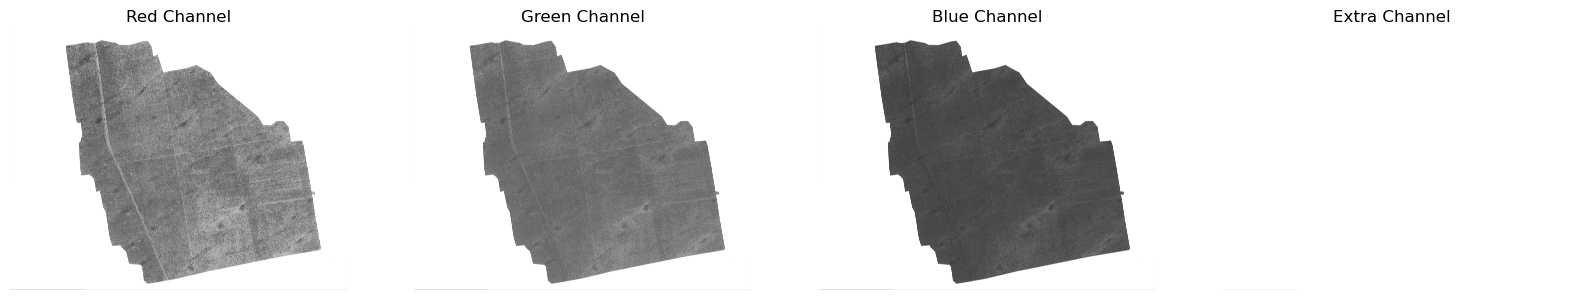

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site8.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site2.tif does not have 4 channels


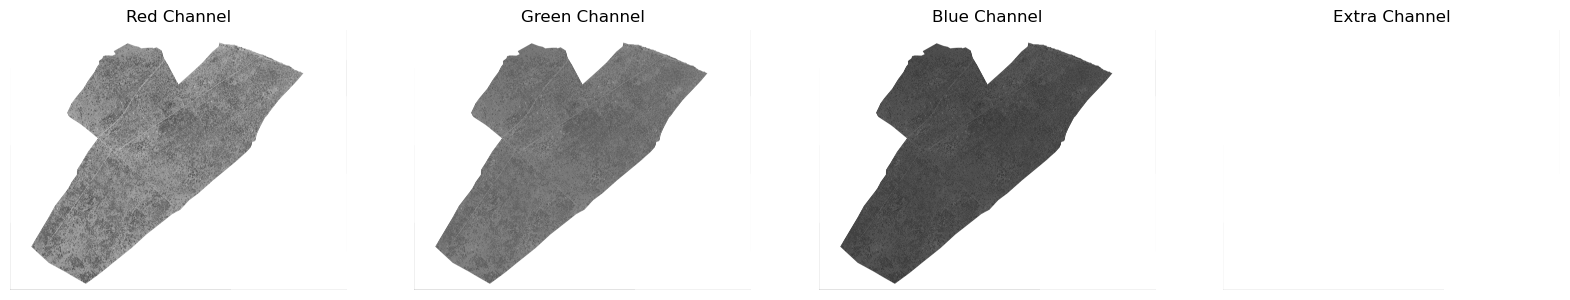

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site16.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site14.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site21.tif does not have 4 channels


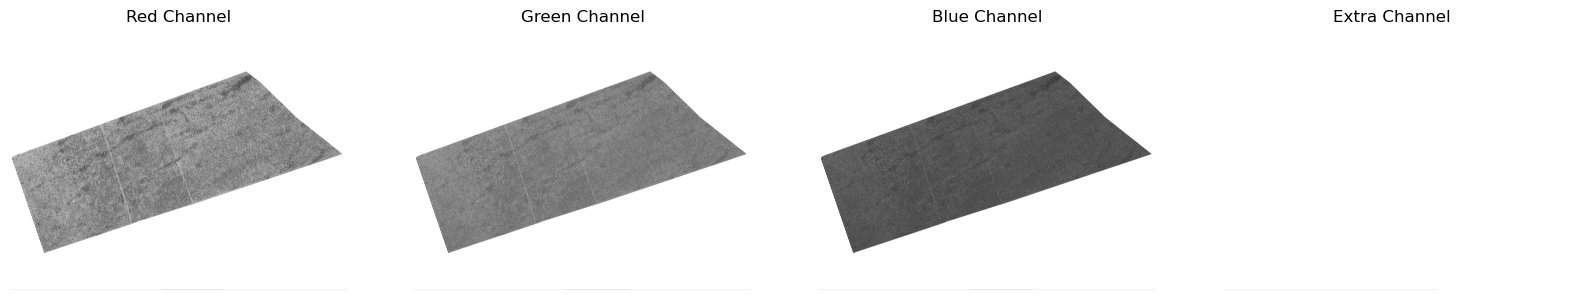

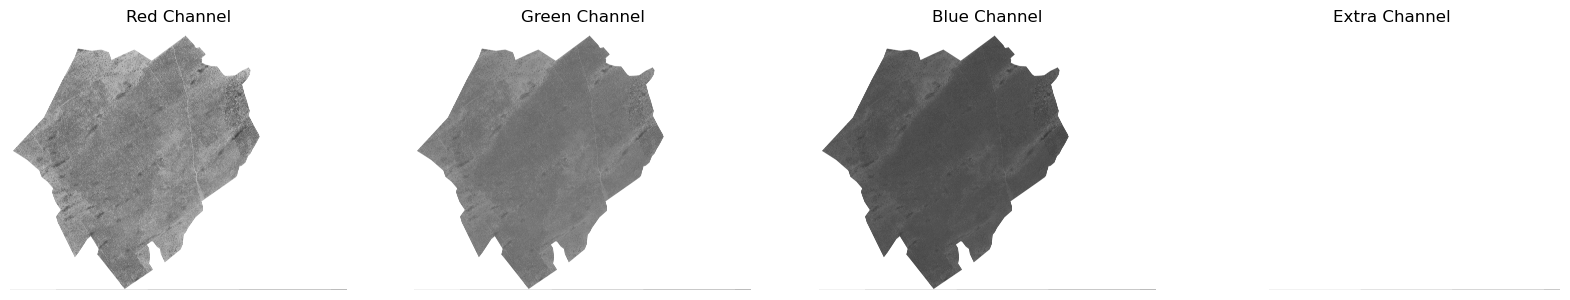

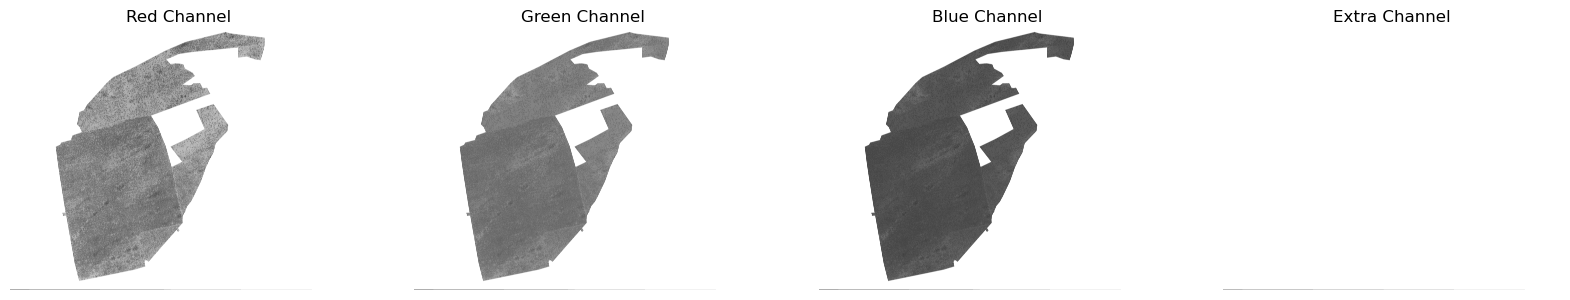

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site15.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site20.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site24.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site6.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site10.tif does not have 4 channels


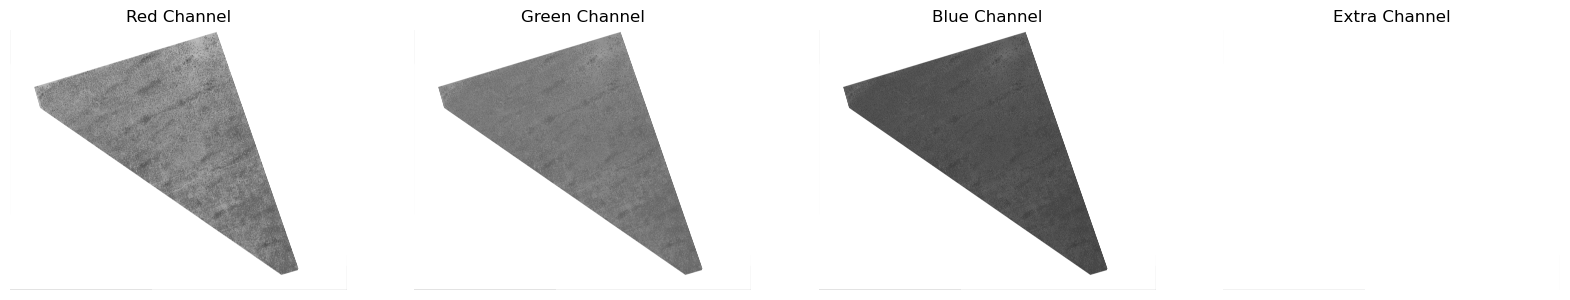

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site18.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site23.tif does not have 4 channels


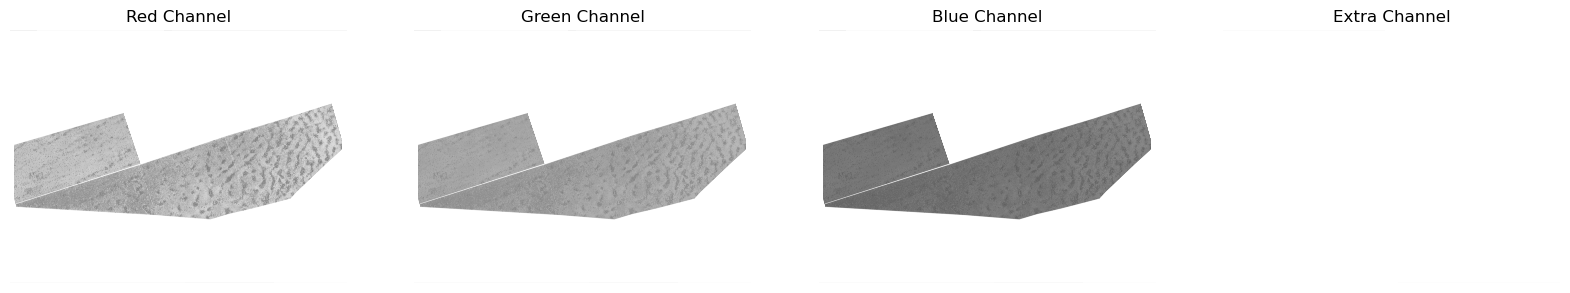

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site1.tif does not have 4 channels


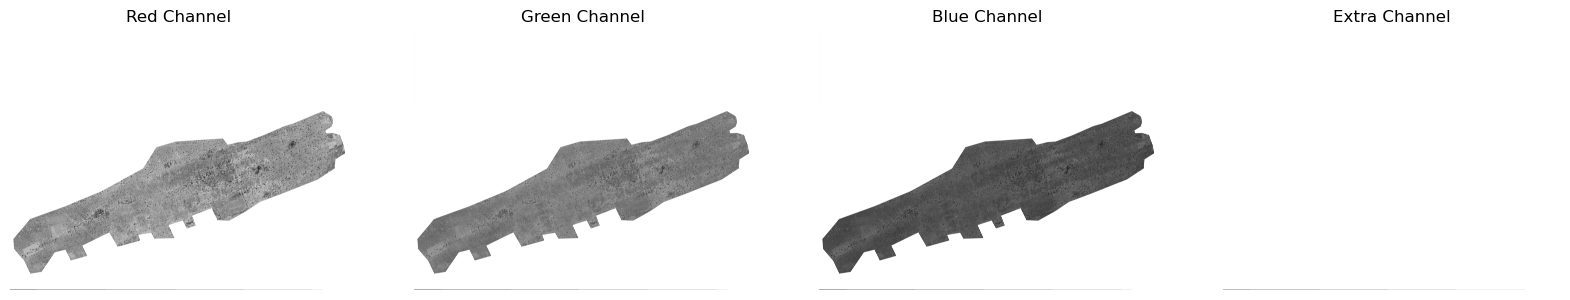

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs\site3.tif does not have 4 channels


In [37]:
def visualize_channels(image_path):
    img = skio.imread(image_path)
    height, width, channels = img.shape

    if channels != 4:
        print(f"Image {image_path} does not have 4 channels")
        return

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    channel_names = ['Red', 'Green', 'Blue', 'Extra']

    for i in range(4):
        axs[i].imshow(img[:, :, i], cmap='gray')
        axs[i].set_title(f'{channel_names[i]} Channel')
        axs[i].axis('off')

    plt.show()

tifs_path = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project/tifs"

for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        visualize_channels(tif_file)

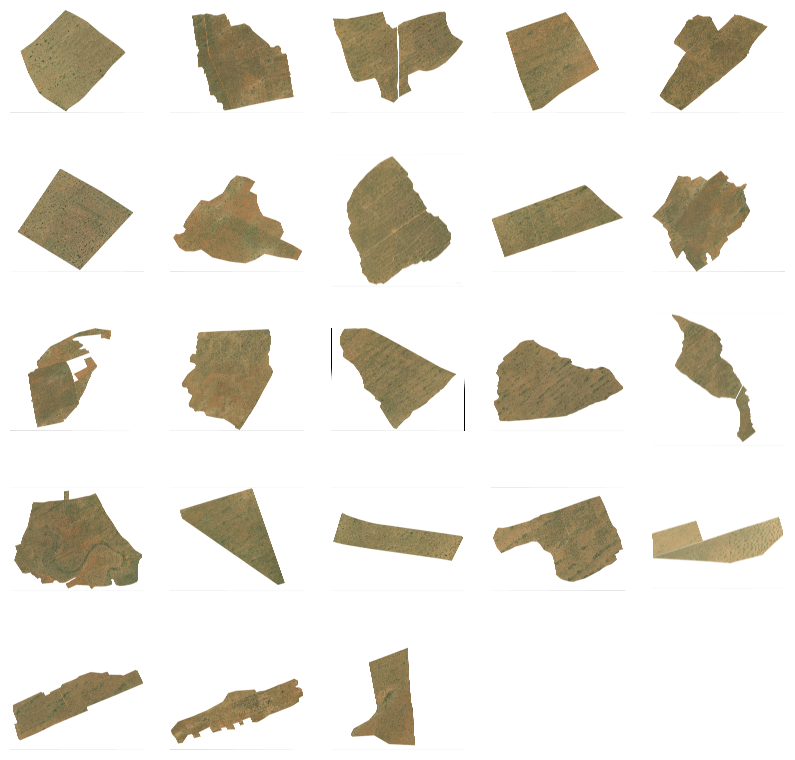

In [32]:
from matplotlib import gridspec

# Create a 5x5 grid
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(5, 5)

# Iterate through each tif file and place it in the grid
for i in range(5):
    for j in range(5):
        if i*5 + j < len(tifs):
            tif = tifs[i*5 + j]
            ax = fig.add_subplot(gs[i,j])
            ax.imshow(tif)
            ax.set_axis_off()

plt.show()

In [5]:
tifs[1].shape

(5100, 6600, 4)

In [38]:
def extract_and_pad_patches(image, patch_size=(256, 256, 3), stride=256):
    patches = []
    height, width, channels = image.shape

    # If the image has more than 3 channels, extract only the first 3 (assumes RGB)
    if channels > 3:
        image = image[:, :, :3]

    for y in range(0, height, stride):
        for x in range(0, width, stride):
            patch = image[y:y+patch_size[0], x:x+patch_size[1], :]

            # Check if padding is needed
            if patch.shape[0] < patch_size[0] or patch.shape[1] < patch_size[1]:
                pad_height = patch_size[0] - patch.shape[0]
                pad_width = patch_size[1] - patch.shape[1]

                # Pad the patch with zeros (black)
                patch = np.pad(
                    patch,
                    pad_width=((0, pad_height), (0, pad_width), (0, 0)),
                    mode='constant',
                    constant_values=0
                )

            patches.append(patch)

    return patches

In [39]:
# create an empty list to store the tif files
tif_patches_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        img = skio.imread(tif_file)

        # Extract and pad patches from the image
        patches = extract_and_pad_patches(img)
        tif_patches_list.append(patches)

# convert each list of patches to a numpy array
tif_patches_array = [np.array(patches) for patches in tif_patches_list]

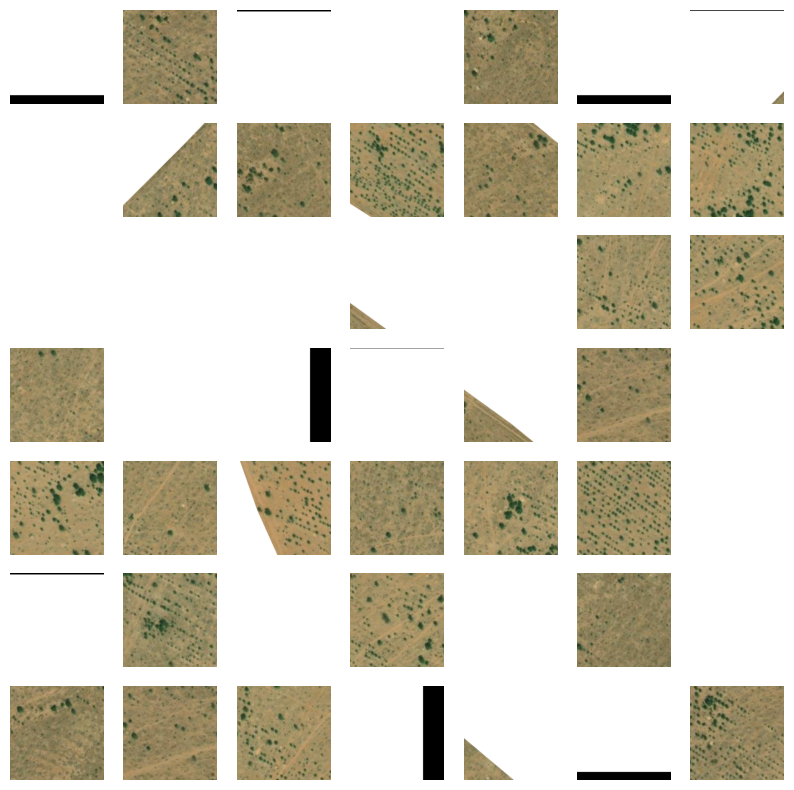

In [40]:
# print 49 random images from tif_patches_array in a 7x7 grid, but with no borders or axes
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(tif_patches_array[0][np.random.randint(0, len(tif_patches_array[0]))])
    ax.axis('off')
plt.show()

In [41]:
# Loop through tif_patches_array and print the shape of each array
for i, patches in enumerate(tif_patches_array):
    print(f"Array {i}: shape = {patches.shape}")

Array 0: shape = (520, 256, 256, 3)
Array 1: shape = (520, 256, 256, 3)
Array 2: shape = (520, 256, 256, 3)
Array 3: shape = (520, 256, 256, 3)
Array 4: shape = (520, 256, 256, 3)
Array 5: shape = (520, 256, 256, 3)
Array 6: shape = (520, 256, 256, 3)
Array 7: shape = (8742, 256, 256, 3)
Array 8: shape = (520, 256, 256, 3)
Array 9: shape = (520, 256, 256, 3)
Array 10: shape = (520, 256, 256, 3)
Array 11: shape = (520, 256, 256, 3)
Array 12: shape = (520, 256, 256, 3)
Array 13: shape = (520, 256, 256, 3)
Array 14: shape = (8742, 256, 256, 3)
Array 15: shape = (520, 256, 256, 3)
Array 16: shape = (520, 256, 256, 3)
Array 17: shape = (520, 256, 256, 3)
Array 18: shape = (520, 256, 256, 3)
Array 19: shape = (6674, 256, 256, 3)
Array 20: shape = (520, 256, 256, 3)
Array 21: shape = (520, 256, 256, 3)
Array 22: shape = (520, 256, 256, 3)


In [42]:
# Concatenate all of the images in tif_patches_array into a single array
tif_patches_full = np.concatenate(tif_patches_array, axis=0)

In [43]:
tif_patches_full.shape

(34558, 256, 256, 3)

Great, now we can augment our images to give ourselves more data to train on. We'll simply double it.

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# define the number of samples to generate
n_samples = int(tif_patches_full.shape[0])

In [47]:
print(n_samples)

34558


In [51]:
y = None
augmented_data = datagen.flow(tif_patches_full, y, batch_size=n_samples)

# Access and visualize a batch of augmented images
batch_X = next(augmented_data)

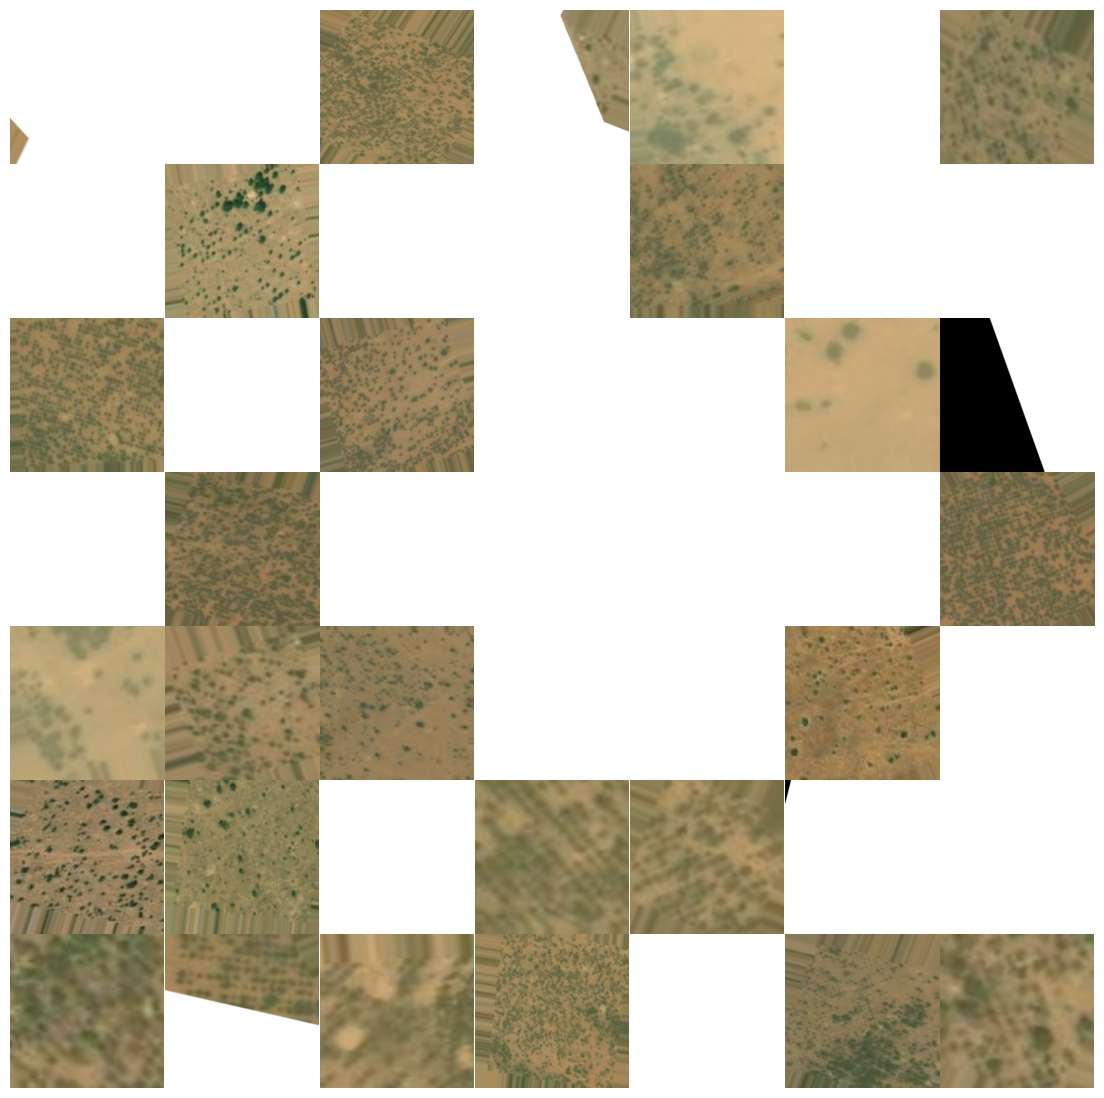

In [54]:
import matplotlib.pyplot as plt

# Set up the grid of subplots
fig, axes = plt.subplots(7, 7, figsize=(14, 14))

# Remove the space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Loop through the images and display them in the grid
for i in range(7):
    for j in range(7):
        img_index = i * 7 + j
        if img_index < len(batch_X):
            axes[i, j].imshow(batch_X[img_index].astype('uint8'))

        # Remove axis ticks and labels
        axes[i, j].axis('off')

# Show the grid of images
plt.show()

In [55]:
# Concatenate batch_X with tif_patches_full
tif_patches_full_augmented = np.concatenate((tif_patches_full, batch_X), axis=0)

# Check the new shape of tif_patches_full_augmented
print(f"New shape of tif_patches_full_augmented: {tif_patches_full_augmented.shape}")

New shape of tif_patches_full_augmented: (69116, 256, 256, 3)


In [17]:
import tensorflow as tf

tf.test.is_gpu_available()

True

In [18]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
